In [17]:
%matplotlib inline
import geopandas

from shapely.geometry import Point

import sys
sys.path.insert(0, "../")
from weavingspace import TileShape
from weavingspace import TileUnit
from weavingspace import Tiling

In [19]:
ak = geopandas.read_file("data/imd-auckland-2018.gpkg")

# Concentric annuli
This example looks at how a circular element might be fit inside difference base tiles, to produce different densities of regularly arranged motifs. The annuli idea seems well suited to conveying a relatively large number of attributes, although care would be required to make the more significant elements the larger ones, perhaps.

In [20]:
d = 200
c = [Point((0, 0)).buffer(r) for r in range(d, 0, -d//7)]
annuli = [circ.difference(c[i + 1]) for i, circ in enumerate(c[:-1])] + c[-1:]

tile = geopandas.GeoDataFrame(
    geometry = geopandas.GeoSeries(annuli),
    crs = ak.crs, data = {"tile_id": list("abcdefg")}
)

In [21]:
# rect_base = TileUnit(crs = 2193, spacing = 2 * d)
# rect_base.tiles = tile
# ax = rect_base.tiles.plot(column = "tile_id")
# rect_base.prototile.plot(ax = ax, alpha = 0.35)

<Axes: >

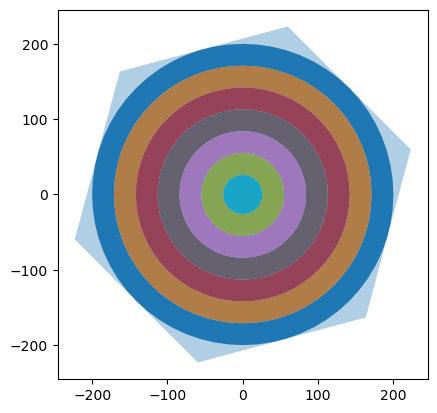

In [22]:
hex_base = TileUnit(crs = 2193, base_shape = TileShape.HEXAGON, spacing = 2 * d).transform_rotate(15)
hex_base.tiles = tile
ax = hex_base.tiles.plot(column = "tile_id")
hex_base.prototile.plot(ax = ax, alpha = 0.35)

<Axes: >

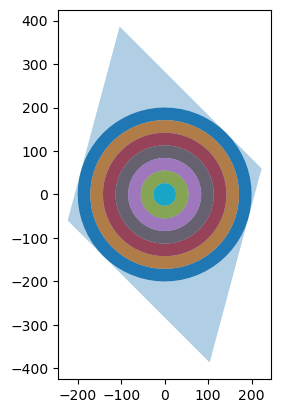

In [23]:
tri_d_base = TileUnit(crs = 2193, base_shape = TileShape.TRIANGLE, 
                      to_hex = False, spacing = d * 4 / 3).transform_rotate(15)
tri_d_base.tiles = tile
ax = tri_d_base.tiles.plot(column = "tile_id")
tri_d_base.prototile.plot(ax = ax, alpha = 0.35)

In [24]:
# tiling = Tiling(tri_d_base, ak, id_var = "DZ2018")
# tiling = Tiling(rect_base, ak, id_var = "DZ2018")
tiling = Tiling(hex_base, ak)

In [25]:
t15 = tiling.get_tiled_map(use_centroid_lookup_approximation=True)

No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.
No colour maps provided! Setting some defaults.


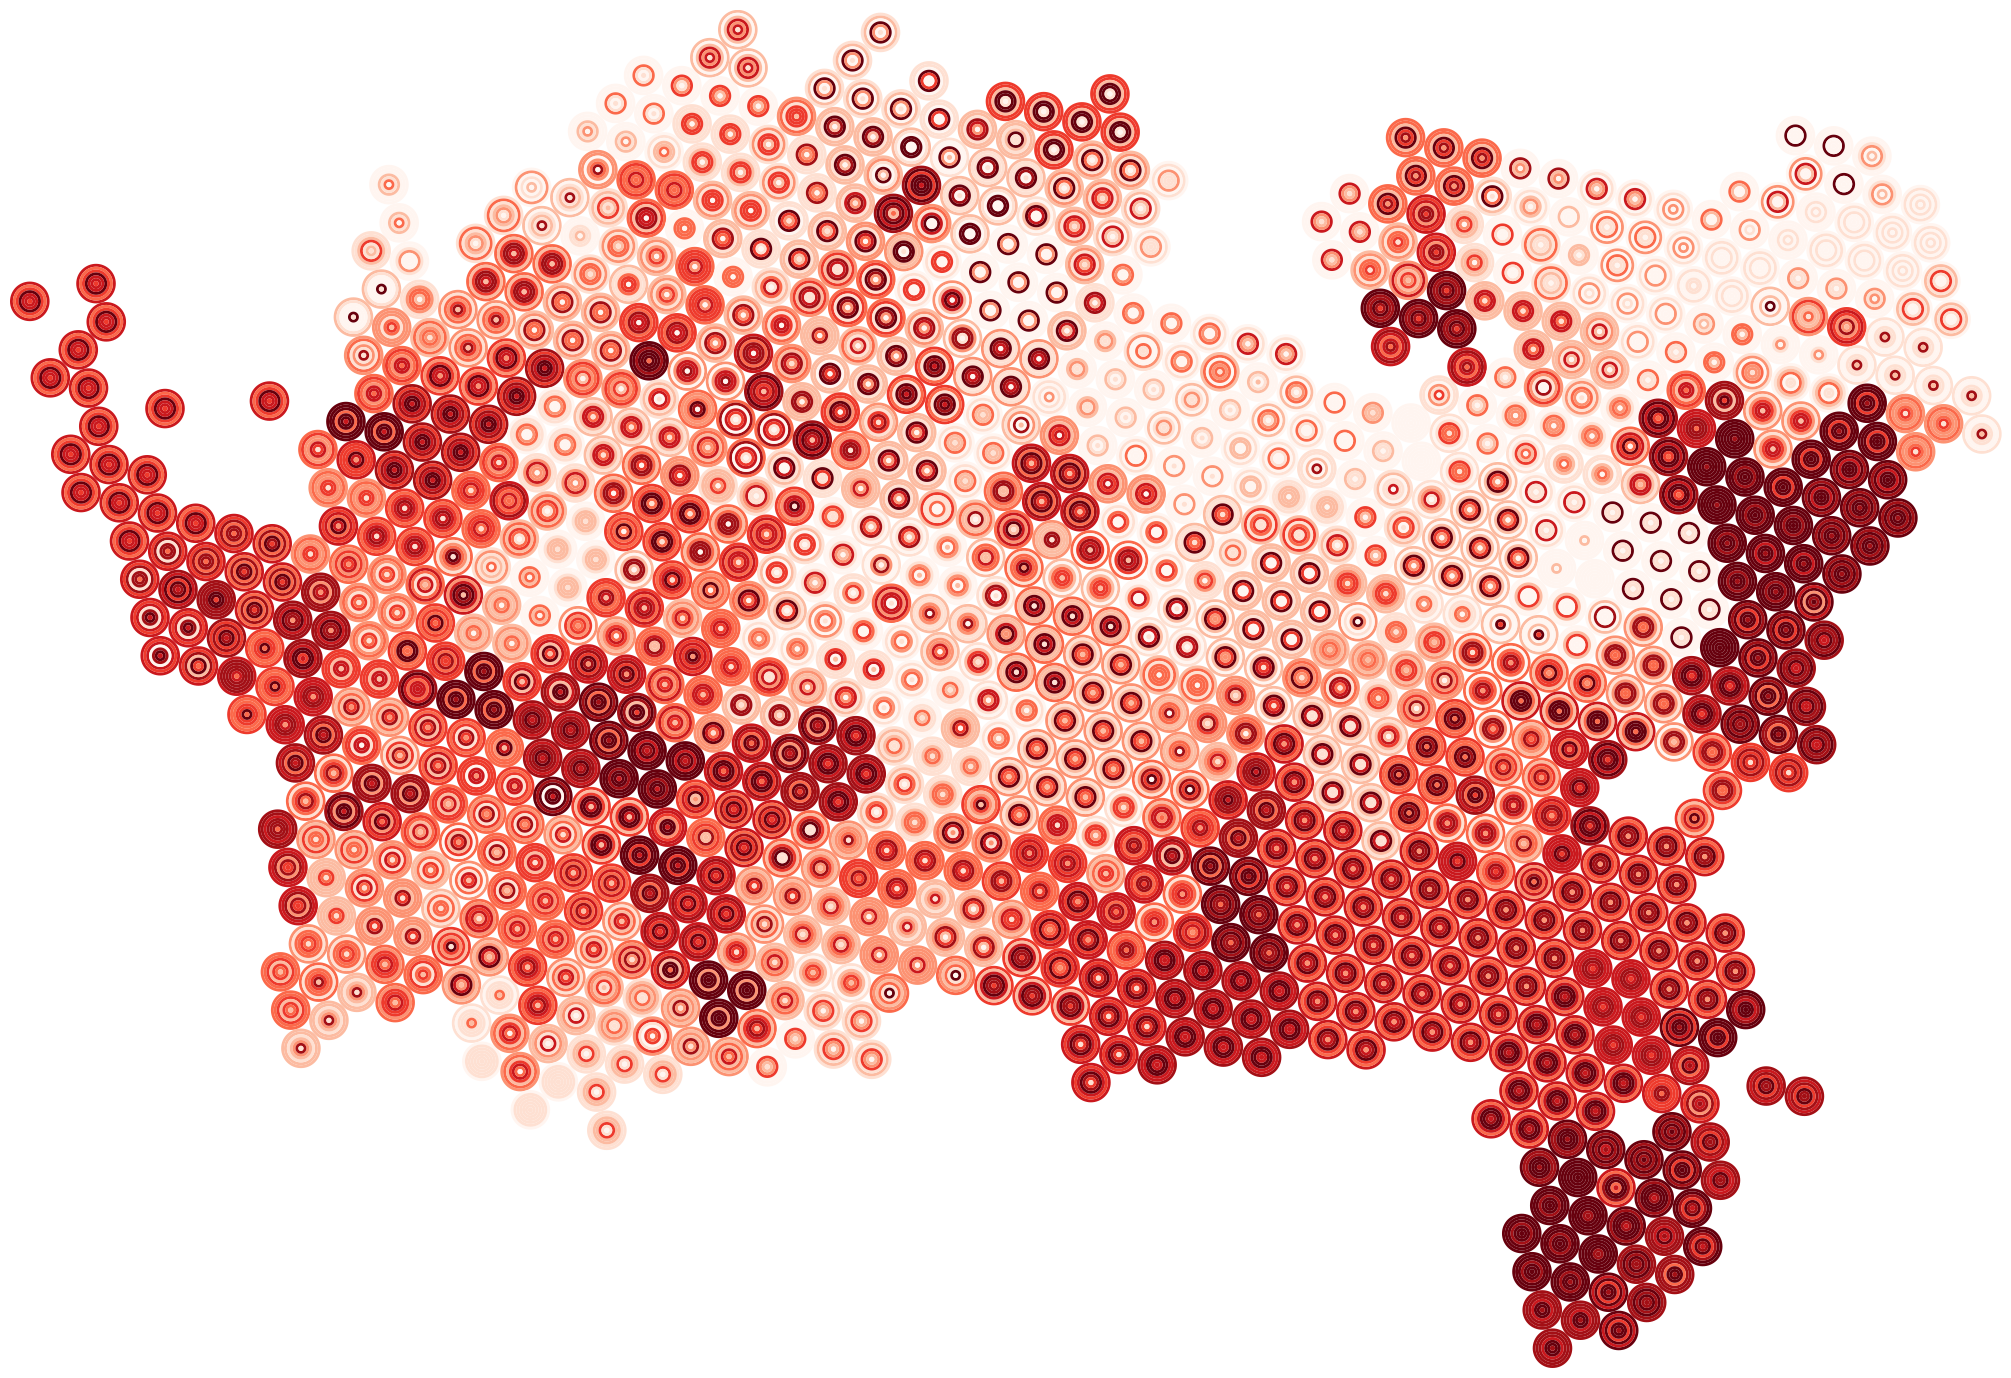

In [26]:
t15.vars_to_map = [x for x in t15.map.columns if "Rank" in x]
fig = t15.render(legend = False)